copyright:席灏铖 HAOCHENG XI

I think some data is unnecessary in the original CSV, that is, not related to the total population of Singapore, so I excluded these data and re established the regression model.


Resident population (quantity)
Singapore citizen population (quantity)
permanent resident population (quantity)
non-resident population (quantity)
resident population growth (%)
median age of permanent resident population (year)
median age of citizen population (year)
natural growth of residents (quantity)




我认为有些数据在原始csv中是没必要的，即与新加坡总人口不相关，于是排除这些数据重新做回归模型

居民人口（数量）
新加坡公民人口（数量）
常住人口（人数）
非居民人口（数量）
居民人口增长（%）
常住人口年龄中位数（年）
公民人口年龄中位数（年）
居民自然增长（数量）

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
input_file_path = 'singapore data.csv'

# 替换 'output_file.csv' 为你的输出文件路径
output_file_path = 'singapore data_filter.csv'

# 指定要删除的列的索引（从0开始计数）
columns_to_remove = [2, 3, 4, 5, 7, 10, 11, 28]

# 读取 CSV 文件
dataFilter = pd.read_csv(input_file_path)

# 删除指定列
dataFilter = dataFilter.drop(dataFilter.columns[columns_to_remove], axis=1)

# 将剩余列写入新的 CSV 文件
dataFilter.to_csv(output_file_path, header=True, index=False)

print("Filtered CSV file created:", output_file_path)

Filtered CSV file created: singapore data_filter.csv


training model
训练模型

In [4]:
data = pd.read_csv(output_file_path)

In [5]:
# 数据清洗
data.dropna(inplace=True)

# Eigenvector Engineering
# 特征工程
X = data.iloc[:, 2:]
y = data.iloc[:, 1]
# print(X.head())
# print(y.head())

Divide the dataset into training and testing sets, use the training set to train the model, and use the testing set to evaluate the model.

将数据集分成训练集和测试集，用训练集来训练模型，用测试集来评估模型

In [6]:
# 将最后三行作为测试集（2020~2022）
X_train = X.iloc[:-3]
X_test = X.iloc[-3:]

y_train = y.iloc[:-3]
y_test = y.iloc[-3:]

generative situation

一般情况

In [7]:
# from sklearn.model_selection import train_test_split
#
# # 数据集划分
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Mean squared error (MSE) is a common indicator used to measure the difference between predicted and actual values. The smaller the value of MSE, the more accurate the model's prediction is.

均方差（MSE）是用于衡量预测值与实际值之间差异的一种常见指标。MSE的数值越小，表示模型的预测越准确。

In [8]:
# from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# # 线性回归模型
predictModel = LinearRegression()

# predictModel=tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=8)
# predictModel=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=10)
# 模型训练
predictModel.fit(X_train, y_train)

# 模型评估
y_predTest = predictModel.predict(X_test)
mseTest = mean_squared_error(y_test, y_predTest)
print('The mean square error (MSE) of the test data is：', mseTest)

y_predTrain = predictModel.predict(X_train)
mseTrain = mean_squared_error(y_train, y_predTrain)
print('The mean square error (MSE) of the train data is：', mseTrain)

The mean square error (MSE) of the test data is： 34033976490.29073
The mean square error (MSE) of the train data is： 325586443.9249873


At this point, due to the exclusion of certain elements in the feature vector, especially:
Resident population (quantity)
Singapore Citizen Population (Quantity)
Natural growth of residents (quantity)
This may have resulted in two situations:

- Model overfitting: Overfitting can cause the model to be overly sensitive to training data and perform poorly on unseen data, leading to an increase in MSE.

- An increase in the proportion of outliers: Due to the presence of more NAN values in other eigenvalues, the presence of more outliers leads to an increase in MSE, as these outliers may have a significant impact on the calculation of the average error. MSE is sensitive to outliers because the squared error amplifies the impact of outliers.

This confirms the overfitting results in the following steps.


此时，由于我们排除了特征向量中某些元素，尤其是：
居民人口（数量）
新加坡公民人口（数量）
居民自然增长（数量）
可能导致了以下两种情况：

模型过拟合： 过拟合会导致模型对训练数据过于敏感，而在未见过的数据上表现不佳，进而导致MSE增大。

异常值占比变大： 由于其他特征值向量内有NAN值较多，存在更多异常值，便导致MSE增大，因为这些异常值可能对平均误差的计算产生较大的影响。MSE对离群值敏感，因为误差平方会放大离群值的影响。

这正是印证了下面步骤中过拟合的结果。

Calculate the slope and intercept, and draw the best fit line on empirical data.

计算斜率和截距，在经验数据上绘制最佳拟合线。

Because we need to calculate the slope intercept, only the LinearRegression () method has slope and intercept parameters, so we can only use linear regression for now. I have not found any relevant parameters for the decision tree model and random forest model that can be used。

因为要计算斜率截距，那么只有LinearRegression()方法存在slope和intercept参数，只能暂且先使用线性回归，我暂时没发现决策树模型和随机森林模型的相关可使用参数

使用一个循环体，让每一个X_train中的元素都作为自变量和y画散点图和预测折线图，每种各画一幅图，且得出斜率和纵截距

For Feature 1: Slope = -257945.42, Intercept = 4886046.65


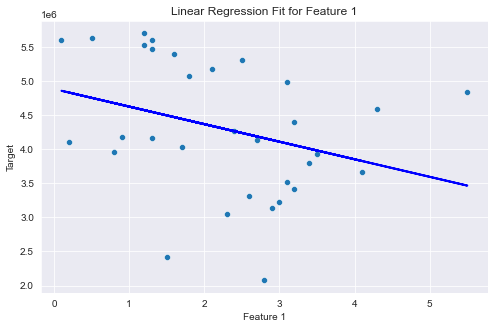

For Feature 2: Slope = 854.80, Intercept = -1050110.33


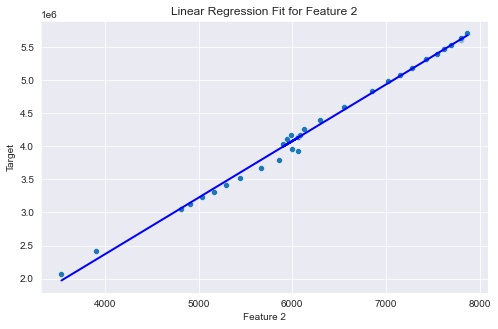

For Feature 3: Slope = -40841.14, Intercept = 44800134.33


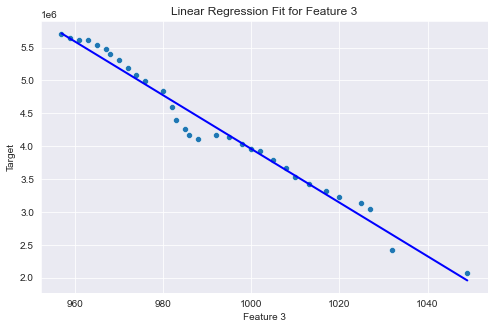

For Feature 4: Slope = -374203.65, Intercept = 7767416.48


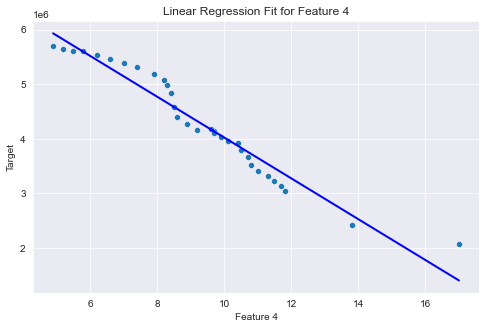

For Feature 5: Slope = -97688.62, Intercept = 8277432.28


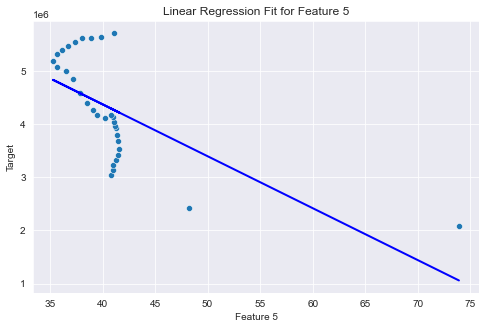

For Feature 6: Slope = -96398.19, Intercept = 7098302.12


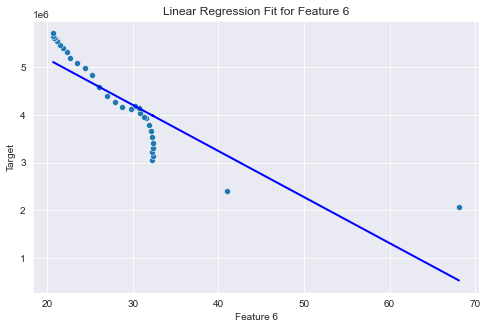

For Feature 7: Slope = 260814.93, Intercept = 1255773.81


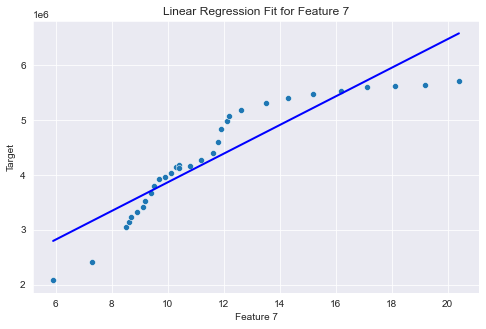

For Feature 8: Slope = -471130.52, Intercept = 8212302.15


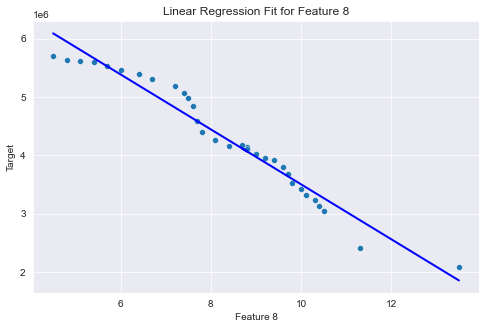

For Feature 9: Slope = -52385.60, Intercept = 7263503.80


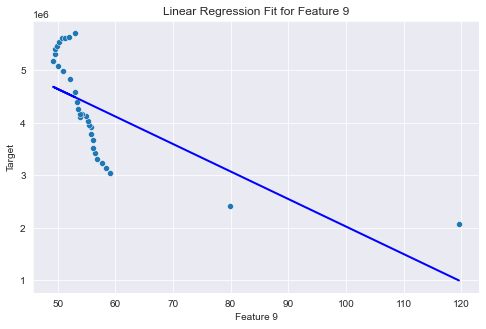

For Feature 10: Slope = -53729.80, Intercept = 6645803.50


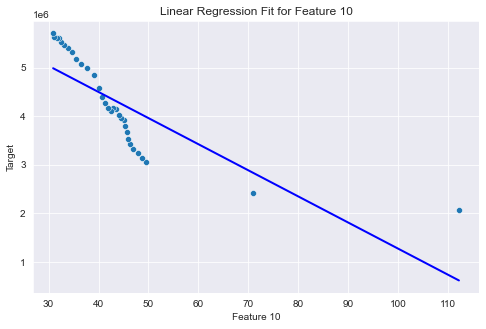

For Feature 11: Slope = 245751.24, Intercept = 1133904.45


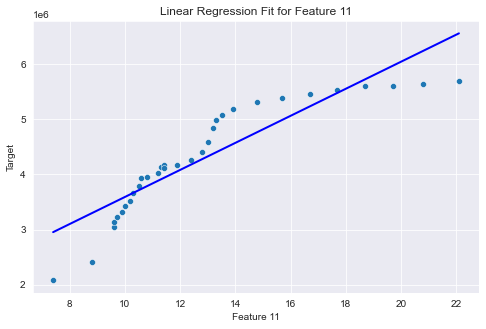

For Feature 12: Slope = -342460.45, Intercept = 7276777.96


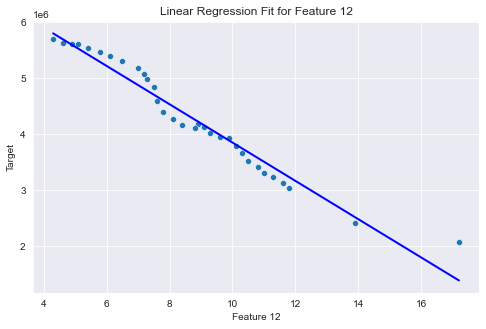

For Feature 13: Slope = -75923.76, Intercept = 7559857.53


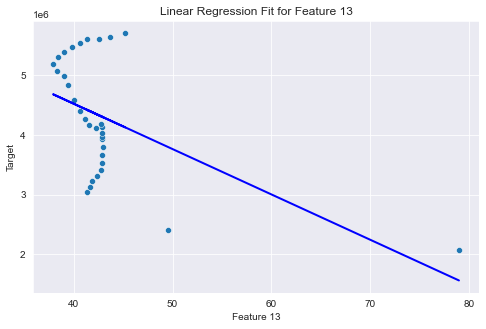

For Feature 14: Slope = -87327.21, Intercept = 6933139.52


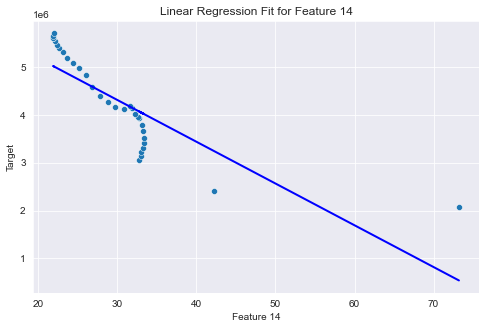

For Feature 15: Slope = 213033.11, Intercept = 1580702.44


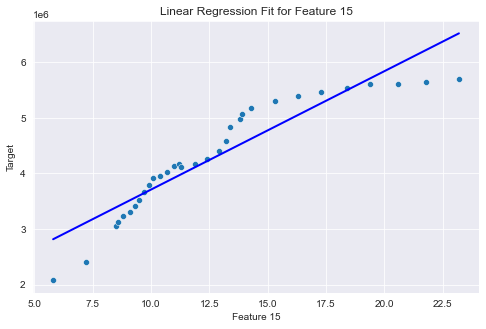

For Feature 16: Slope = -427538.46, Intercept = 7602253.77


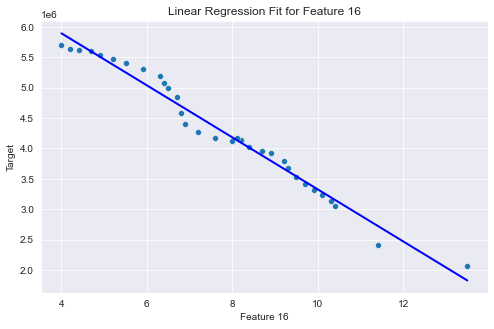

For Feature 17: Slope = -43975.63, Intercept = 6947111.61


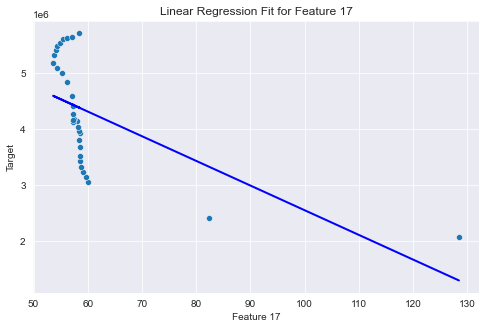

For Feature 18: Slope = -48540.97, Intercept = 6531073.66


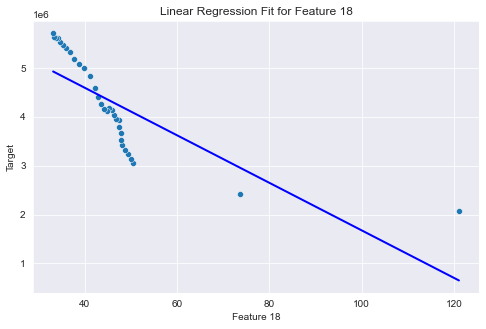

For Feature 19: Slope = 198015.73, Intercept = 1487470.81


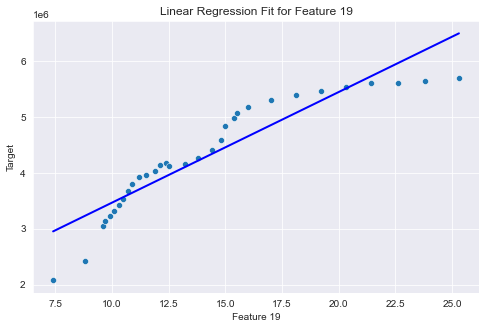

For Feature 20: Slope = -270711.71, Intercept = 6424028.50


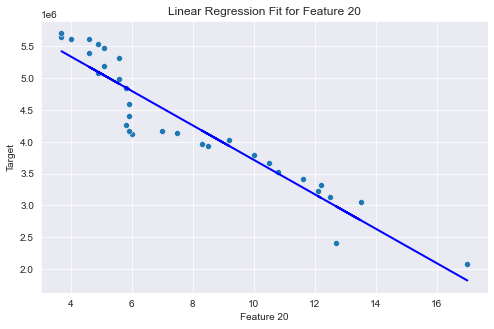

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each feature column in X_train
for i in range(X_train.shape[1]):
    feature_col = X_train.iloc[:, i]

    # Creating a linear regression model
    model = LinearRegression()
    model.fit(feature_col.values.reshape(-1, 1), y_train)

    # Plotting the scatter plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature_col, y=y_train)

    # Plotting the regression line
    plt.plot(feature_col, model.predict(feature_col.values.reshape(-1, 1)), color='blue', linewidth=2)

    # Adding labels and title
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Target')
    plt.title(f'Linear Regression Fit for Feature {i + 1}')

    # Print coefficients (slope and intercept) below the plot
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"For Feature {i + 1}: Slope = {slope:.2f}, Intercept = {intercept:.2f}")

    # Show each plot separately
    plt.show()



散点图矩阵:
其中对角线上是X每个特征元素与目标变量total population的散点图，非对角线上是X特征向量每一个元素之间的散点图。颜色深浅表示散点的密度，可以帮助观察特征向量X的每一个元素与目标变量total population之间的关系。

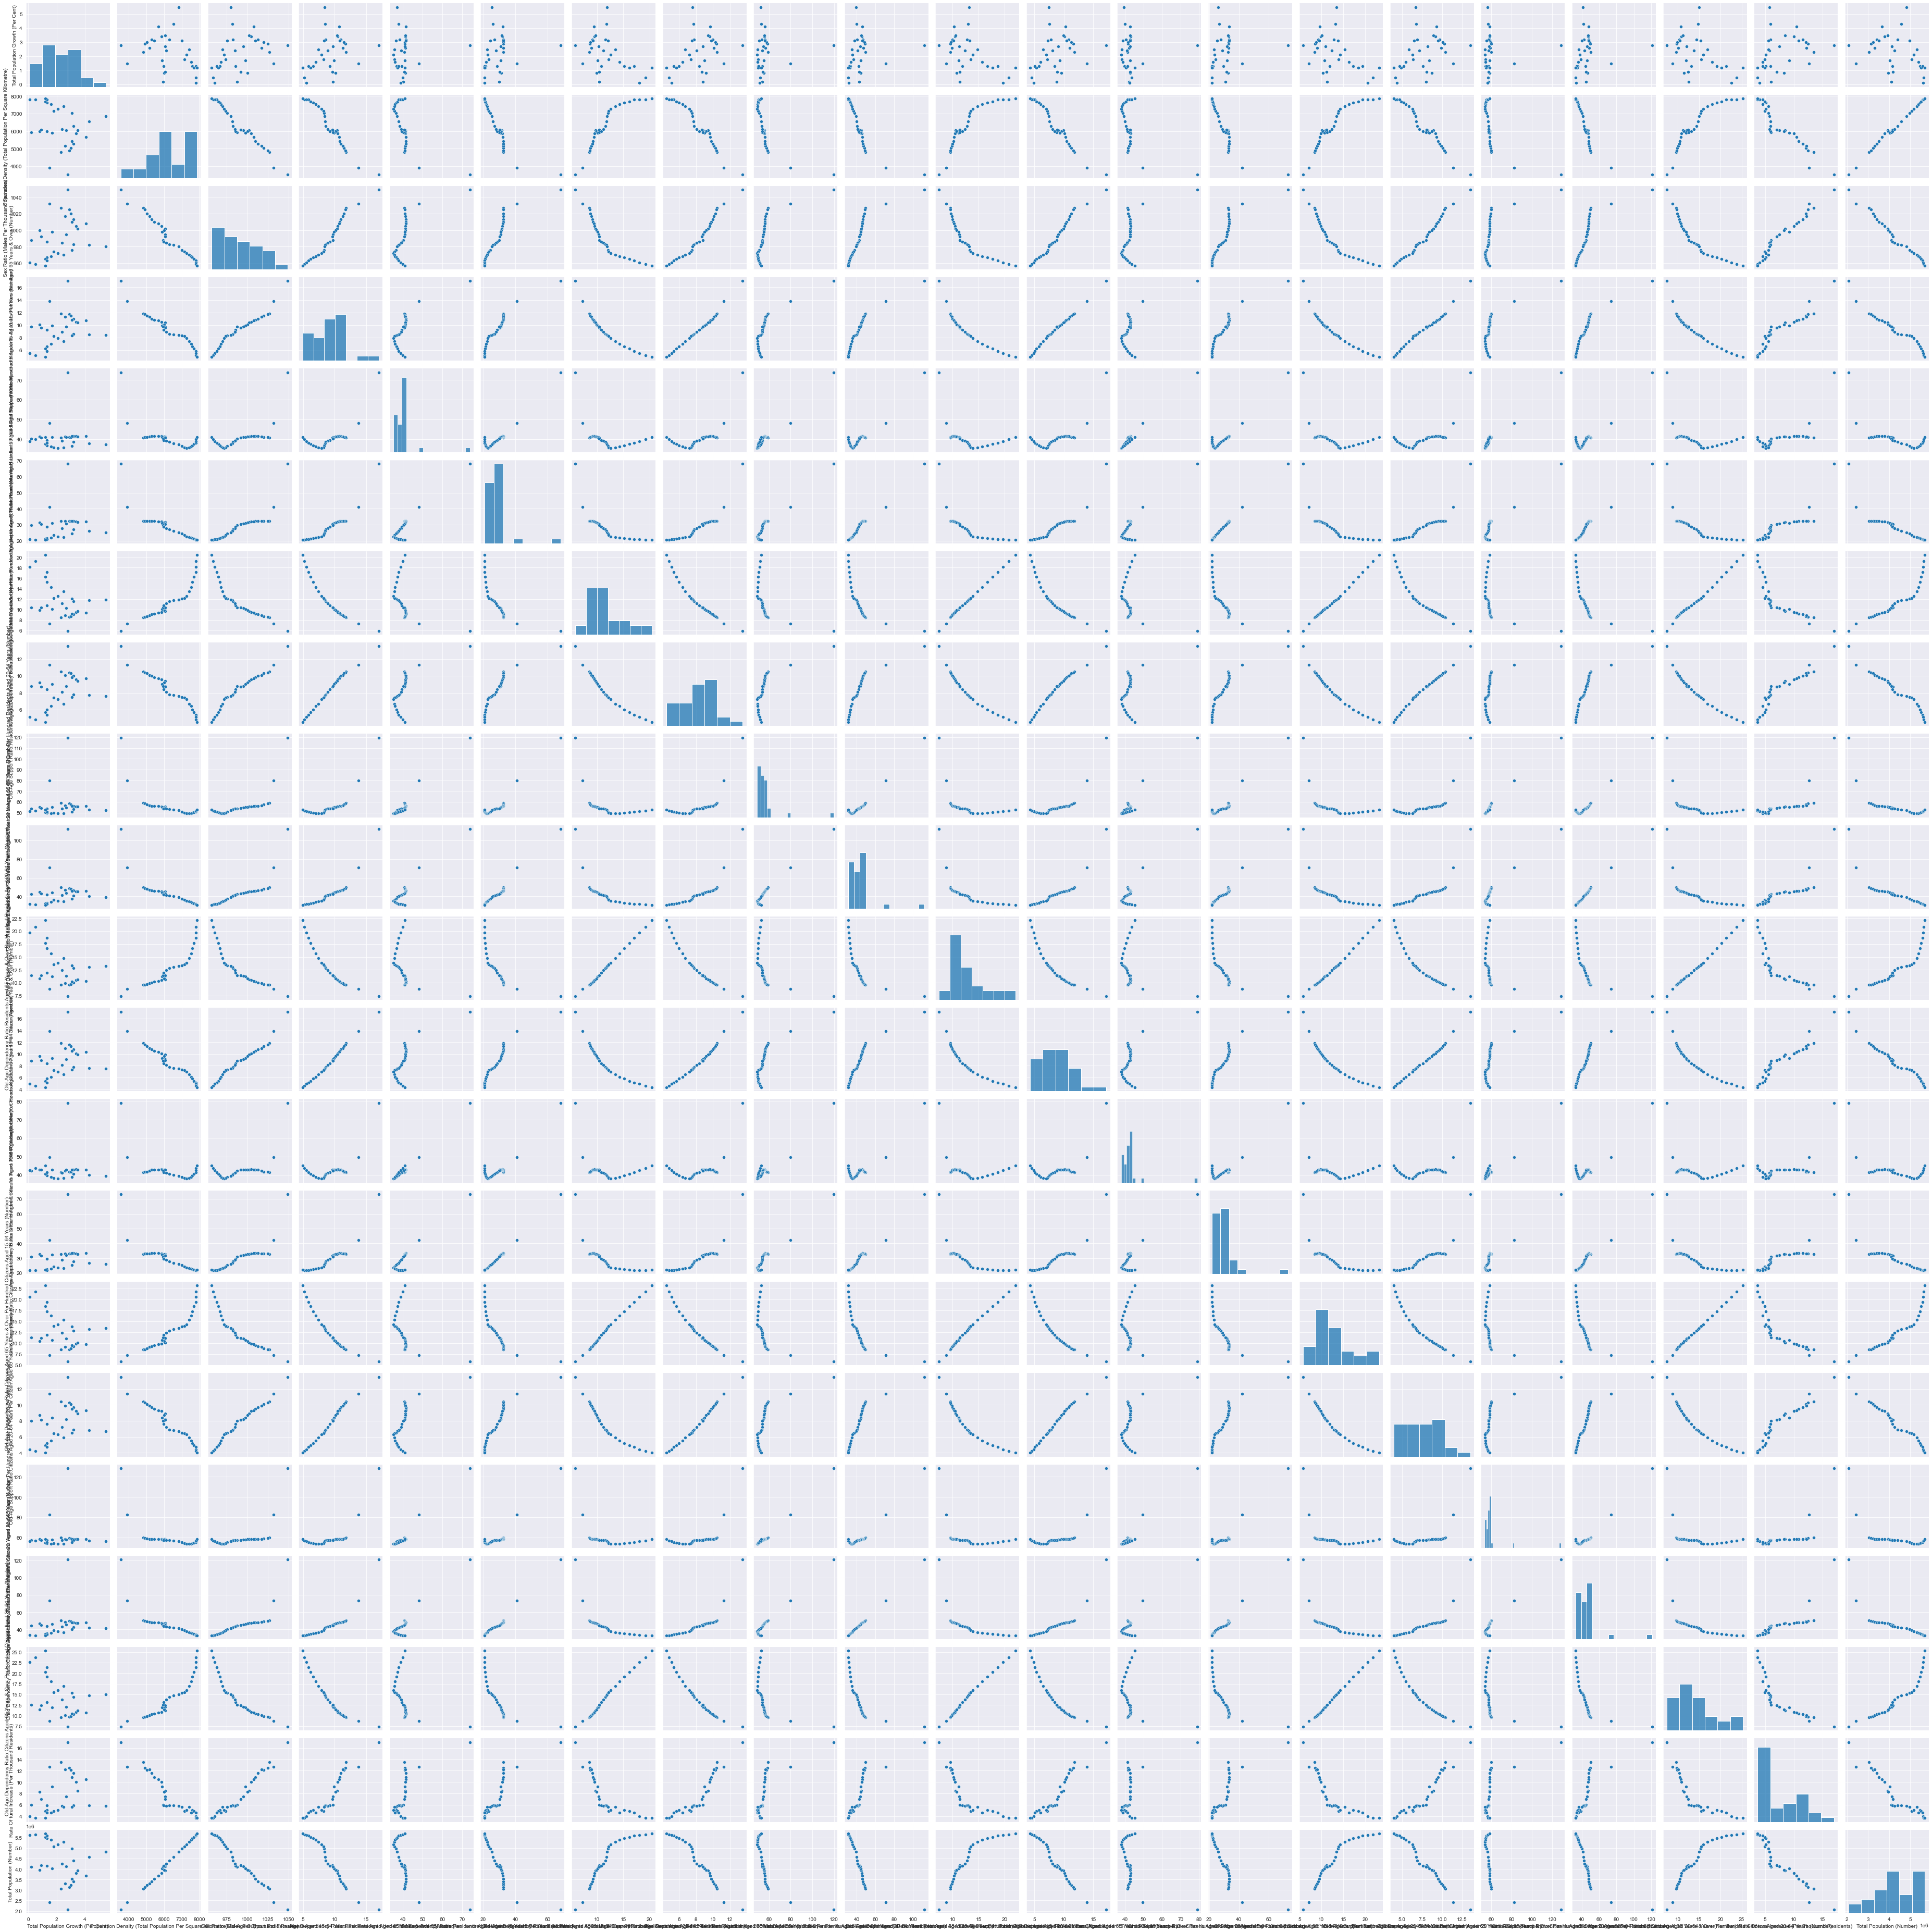

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features and target variable for visualization
df_visualization = pd.concat([X_train, y_train], axis=1)

# Plotting the scatter plot matrix
sns.pairplot(df_visualization)
plt.show()

3D 散点图:
可以选择三个特征绘制在三维空间中。这就需要在 3D 图上绘制点，其中横轴和纵轴分别是两个特征，高度则表示目标变量。

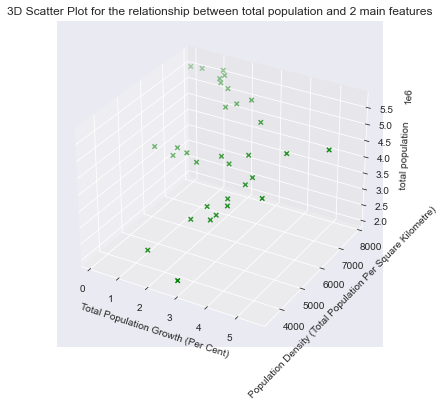

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Choose two features for 3D scatter plot
feature1 = X_train.columns[0] # 增长率
feature2 = X_train.columns[1] # 人口密度
feature3 = y_train

# Creating 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[feature1], X_train[feature2], y_train, c='green', marker='x')

# Adding labels and title
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('total population')
ax.set_title('3D Scatter Plot for the relationship between total population and 2 main features')

# Displaying the plot
plt.show()


At this point, it was found that the model was overfitting, which would lead to a decrease in its migration ability and poor prediction results on other models, making it unable to cope well with more population prediction problems.

此时发现这个模型有些过拟合（over-fitting)了，这会导致这个模型的迁移能力下降，在其他模型上的预测结果会不太好，不能很好的应对更多的人口预测问题。

R-squared
Square (value) is a statistical measure that represents the predictable ratio of variance in the dependent variable to the independent variable. It is a measure of the degree to which the independent variable explains the variability of the dependent variable.

R值 (R-squared)
平方（值）是一种统计度量，表示因变量中的方差与自变量之间可预测的比例。它是自变量对因变量变异性的解释程度的度量。

In [10]:
r_squared = predictModel.score(X_test, y_test)
print(-r_squared)

2.404458242099219


以大于2020年的年份作为测试数据，并预测这些年份的人口。

In [11]:
# 获取最后三行不要前两列的数据
last_three_rows = np.genfromtxt(output_file_path, delimiter=',')
X_futureFilter = last_three_rows[-3:, 2:]

# print(X_futureFilter)

feature_names = X_train.columns
# 将 X_future 转换为一个带有正确列名的 DataFrame
X_future_df = pd.DataFrame(X_futureFilter, columns=feature_names)

y_future = predictModel.predict(X_future_df)

# 输出预测结果
print('(The prediction results of population during 2020 to 2022 are:)2020~2022的人口预测为：')
for prediction in y_future:
    print(int(prediction))

(The prediction results of population during 2020 to 2022 are:)2020~2022的人口预测为：
5732157
5703838
5830198


获取csv文件第一行各列名

In [12]:
import csv

# 指定CSV文件的路径
csv_file_path = 'singapore data_filter.csv'

# 以只读方式打开CSV文件
with open(csv_file_path, 'r') as file:
    # 使用csv.reader读取文件内容
    csv_reader = csv.reader(file)

    # 获取第一行的元素
    first_row = next(csv_reader)

    # # 打印每个元素
    # for element in first_row:
    #     print(element)
first_row = first_row[1:]
# print(first_row)

Calculate the regression equation between the eigenvalues of each column in columns 2-30 and the eigenvalues of the first column separately (print out the equation to represent the parameters), and draw the fitting line

Set year to 202320302050 respectively, substitute {slope:. 4f} * year+{intercept:. 4f}, and write these 28 feature values into my_ In each row of the list


分别计算2~30列每一列的特征值与第1列特征值的回归方程（再print出方程表示出参数），并绘制拟合线

分别令年份year=2023,2030,2050，代入{slope:.4f} * 年份 + {intercept:.4f}，并把这28个特征值写入my_list的每一行中


Regression equation for 列 year: y = 67334.0769 * year + -130562088.0983
Regression equation for 列 Total Population (Number): y = -0.0397 * year + 81.3787
Regression equation for 列 Total Population Growth (Per Cent): y = 58.6364 * year + -111274.8019
Regression equation for 列 Population Density (Total Population Per Square Kilometre): y = -2.4822 * year + 5961.2817
Regression equation for 列 Sex Ratio (Males Per Thousand Females): y = -0.2088 * year + 427.5514
Regression equation for 列 Old-Age Support Ratio:Residents Aged 15-64 Years Per Resident Aged 65 Years & Over (Number): y = -0.6199 * year + 1283.8851
Regression equation for 列 Age Dependency Ratio:Residents Aged Under 15 Years And 65 Years Per Hundred Residents Aged 15-64 Years (Number): y = -0.7885 * year + 1609.0944
Regression equation for 列 Child Dependency Ratio:Residents Aged Under 15 Years Per Hundred Residents Aged 15-64 Years (Number): y = 0.1685 * year + -325.1557
Regression equation for 列 Old-Age Dependency Ratio:Resident

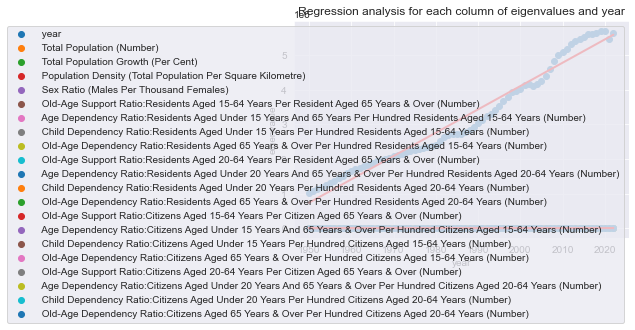

The list of prediction results:
[0.9941780821917803, 7346.576983447492, 939.732876712329, 5.113138231631353, 29.82733499377332, 14.022109796596169, 15.805770029057669, 4.999974055624762, 38.64599418846001, 21.43959111664617, 17.206278538812796, 6.855433789954333, 41.91977168949772, 25.654292237442945, 16.274520547945187, 6.2038127853881235, 56.52979452054794, 38.61614155251141, 17.926826484018278, -1.8408675799087177]
[0.7160310995927404, 7757.031581667281, 922.3572750833027, 3.6514141788114216, 25.488034734609982, 8.502828357622775, 16.98556763488267, 3.8771599744202376, 31.296382933369387, 12.885410566232622, 18.411970874984547, 6.589164506972722, 41.64837714426757, 24.939158336418615, 16.71780821917808, 5.986696285326417, 55.83813402443539, 37.455411575959545, 18.396766629643338, -5.009095396766611]
[-0.07867456497592684, 8929.759005152417, 872.7126990003708, -0.5249402578169793, 13.090033994143596, -7.2665471823006555, 20.356417937239826, 0.6691197424074176, 10.297493633110207, -11

In [35]:
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = np.genfromtxt('singapore data_filter.csv', delimiter=',', skip_header=1)

# 创建一个简单的缺失值填充器，使用均值填充
imputer = SimpleImputer(strategy='mean')
# 对每一列进行填充
data = imputer.fit_transform(data)

# 获取年份列
years = data[:, 0]

#获取csv文件列数——22
num_columns = data.shape[1]

# 创建一个3*20的二维list，存放2023,2030,2050年的所有特征值
py_list = [[0 for _ in range(num_columns - 2)] for _ in range(3)]

# 遍历每一列进行回归分析
for col in range(1, data.shape[1]):
    # 获取当前列的特征值
    feature_values = data[:, col]

    # 使用线性回归模型拟合数据
    model = LinearRegression().fit(years.reshape(-1, 1), feature_values)

    # 获取回归方程的参数
    slope = model.coef_[0]
    intercept = model.intercept_

    # 打印回归方程
    print(f"Regression equation for 列 {first_row[col - 1]}: y = {slope:.4f} * year + {intercept:.4f}")

    # 代入年份并计算预测值，然后将值写入my_list的每一行
    for i, year in enumerate([2023, 2030, 2050]):
        predicted_value = slope * year + intercept
        py_list[i][col - 2] = predicted_value

    # 绘制拟合线
    plt.scatter(years, feature_values, label=f' {first_row[col - 1]}')
    plt.plot(years, model.predict(years.reshape(-1, 1)), color='red', linewidth=2)

# 显示图例和图形
plt.legend()
plt.xlabel('year')
plt.ylabel('eigenvalue')
plt.title('Regression analysis for each column of eigenvalues and year')
plt.show()

# 打印py_list
print("The list of prediction results:")
for row in py_list:
    print(row)


<p style="text-align: center; font-weight: bold; font-size: 1.5em;">"What is the estimated population of Singapore in 2023, 2030, and 2050? Do you think these estimates are reasonable?"</p>

<hr>

I believe that when I exclude some elements from the feature vectors and redo the regression model, my estimate is more in line with the population growth trend from 1950 to 2020, making the regression results more accurate.

我认为当我排除特征向量中的一些元素后，并重新做回归模型后，我的估计值更加符合1950~2020的人扣增长趋势，使得回归结果更为准确。

In [14]:
# residualError = 1e6

In [15]:
# 转换为DataFrame
new_data_df = pd.DataFrame(py_list)
# print(new_data_df)
# 使用训练好的模型进行预测
predicted_population = predictModel.predict(new_data_df)
precautionP = [int(value) for value in predicted_population]
# 打印预测结果
for i, year in enumerate([2023, 2030, 2050]):
    print(f"Predict {year}'s totalPopulation of Singapore is: {precautionP[i]}")

# 5637022

Predict 2023's totalPopulation of Singapore is: 5656706
Predict 2030's totalPopulation of Singapore is: 7400659
Predict 2050's totalPopulation of Singapore is: 12383384


F:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


把预测结果写到新csv文件中

In [16]:
import csv

# 从第一个CSV文件中读取第一行数据
with open('singapore data_filter.csv', 'r') as first_file:
    reader = csv.reader(first_file)
    first_row = next(reader)

# 从pylist中获取要写入的数据
# 创建一个3x30的二维列表
result_list = []

# 每行的第一列写入2023、2030、2050
years = [2023, 2030, 2050]

# 第二列写入总人口

# print(precautionP)
# 第3至30列写入一个3x28的二维列表的所有元素
# 构建结果列表
for i in range(3):
    row = [years[i % 3], precautionP[i % 3]]
    for element in py_list[i % 3]:
        row.append(element)
    # print(row)
    # print("================================================================")
    result_list.append(row)

# # 打印结果列表
# for row in result_list:
#     print(row)

# 将数据写入到新的CSV文件中
with open('prediction_fileSingaporeFilter.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)

    # 写入第一行数据
    writer.writerow(first_row)

    # 写入第2至4行的数据
    writer.writerows(result_list)

print("CSV file has already created and data are written in CSV successfully.")


CSV file has already created and data are written in CSV successfully.


查看csv

In [17]:
import csv

# 读取CSV文件内容并打印
with open('prediction_fileSingapore.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['year', 'Total Population (Number)', 'Resident Population (Number)', 'Singapore Citizen Population (Number)', 'Permanent Resident Population (Number)', 'Non-Resident Population (Number)', 'Total Population Growth (Per Cent)', 'Resident Population Growth (Per Cent)', 'Population Density (Total Population Per Square Kilometre)', 'Sex Ratio (Males Per Thousand Females)', 'Median Age Of Resident Population (Years)', 'Median Age Of Citizen Population (Years)', 'Old-Age Support Ratio:Residents Aged 15-64 Years Per Resident Aged 65 Years & Over (Number)', 'Age Dependency Ratio:Residents Aged Under 15 Years And 65 Years Per Hundred Residents Aged 15-64 Years (Number)', 'Child Dependency Ratio:Residents Aged Under 15 Years Per Hundred Residents Aged 15-64 Years (Number)', 'Old-Age Dependency Ratio:Residents Aged 65 Years & Over Per Hundred Residents Aged 15-64 Years (Number)', 'Old-Age Support Ratio:Residents Aged 20-64 Years Per Resident Aged 65 Years & Over (Number)', 'Age Dependency Ratio:R

<p style="text-align: center; font-weight: bold; font-size: 1.5em;">"What is the expected pattern of population growth in Singapore?"</p>

<hr>
The population is showing a trend of increasing year by year, but in certain determined years, the growth rate decreases significantly, and the total population growth will slow down. But there may be an increase in population growth after 2020.


人口呈逐年增长趋势，但在某些确定年份增长率下降明显，人口总数增长会变缓。但可能在2020年后会出现人口涨幅提升的现象。




<p style="text-align: center; font-weight: bold; font-size: 1.5em;">"How to improve your estimation of future population?"</p>

<hr>

1. * * Data Understanding and Cleaning * *:
-* * Outlier handling * *: Detect and handle outliers to ensure that there are no unreasonable or incorrect population data in the dataset.

   - * * Missing value processing * *: Handle missing values and choose appropriate methods, such as filling in the mean, median, or using a model for interpolation.

2. * * Feature Engineering * *:
-* * Feature Selection * *: Select the most relevant features, which can be selected using statistical methods, feature importance assessment, or based on domain knowledge.
-* * Polynomial features * *: Consider introducing higher-order terms of features, and sometimes non-linear relationships may be modeled by adding higher-order terms of features.
-Interactive features: Create new features and attempt to capture the interaction between different features.
3. * * Model Selection * *:
-* * Choose the appropriate algorithm * *: For population estimation problems, different regression algorithms such as linear regression, decision tree regression, random forest regression, support vector regression, etc. can be tried.
-Integration Method: Consider using ensemble learning methods, such as random forests or gradient boosting trees, to improve the robustness and accuracy of the model.
4. * * Model tuning * *:
-* * Hyperparameter tuning * *: Use techniques such as cross validation to tune the model and select the optimal combination of hyperparameters.
-* * Regularization * *: For linear models, consider using regularization methods (such as L1 or L2 regularization) to prevent overfitting.
-Model Integration: Attempt to integrate multiple models, such as through voting or averaging, to improve overall performance.
5. * * Verification and Evaluation * *:
-Use appropriate evaluation metrics, such as mean squared error (MSE) or mean absolute error (MAE), to evaluate model performance.
-Use cross validation to ensure the robustness of the model on different subsets.


1. **数据理解和清洗**:
   - **异常值处理**: 检测并处理异常值，确保数据集中没有不合理或错误的人口数据。
   - **缺失值处理**: 处理缺失值，选择适当的方法，如填充均值、中位数或使用模型进行插值。

2. **特征工程**:
   - **特征选择**: 选择最相关的特征，可以使用统计方法、特征重要性评估或基于领域知识进行选择。
   - **多项式特征**: 考虑引入特征的高次项，有时候非线性关系可能通过增加特征的高次项来建模。
   - **交互特征**: 创建新的特征，尝试捕捉不同特征之间的交互作用。

3. **模型选择**:
   - **选择合适的算法**: 针对人口数量估计问题，可以尝试线性回归、决策树回归、随机森林回归、支持向量回归等不同的回归算法。
   - **集成方法**: 考虑使用集成学习方法，如随机森林或梯度提升树，以提高模型的鲁棒性和准确性。

4. **模型调优**:
   - **超参数调优**: 使用交叉验证等技术对模型进行调优，选择最佳的超参数组合。
   - **正则化**: 对于线性模型，考虑使用正则化方法（如L1或L2正则化）以防止过拟合。
   - **模型集成**: 尝试将多个模型集成，例如通过投票或平均的方式，以提高整体性能。

5. **验证和评估**:
   - 使用合适的评估指标，如均方误差（MSE）或平均绝对误差（MAE），来评估模型性能。
   - 使用交叉验证来确保模型在不同子集上的稳健性。

